In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Heart Failure Clinical Records dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.shape

(299, 13)

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There is no null values in the Dataset

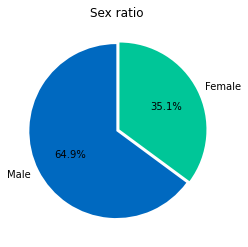

In [6]:
plt.pie(x=df.sex.value_counts(), data=df, labels=['Male', 'Female'], autopct='%1.1f%%', explode=(0, 0.04),shadow=False,
        startangle=90, colors=['#0069C0', '#00C698'])
plt.title('Sex ratio')
plt.show()

Males are having highest population compared to Females

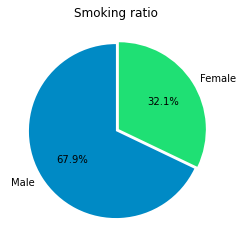

In [7]:
plt.pie(x=df.smoking.value_counts(), data=df, labels=['Male', 'Female'], autopct='%1.1f%%', explode=(0, 0.04),
        startangle=90, colors=['#008AC5', '#1FE074'])
plt.title('Smoking ratio')
plt.show()

Most of the Males will Smoke 

<AxesSubplot:>

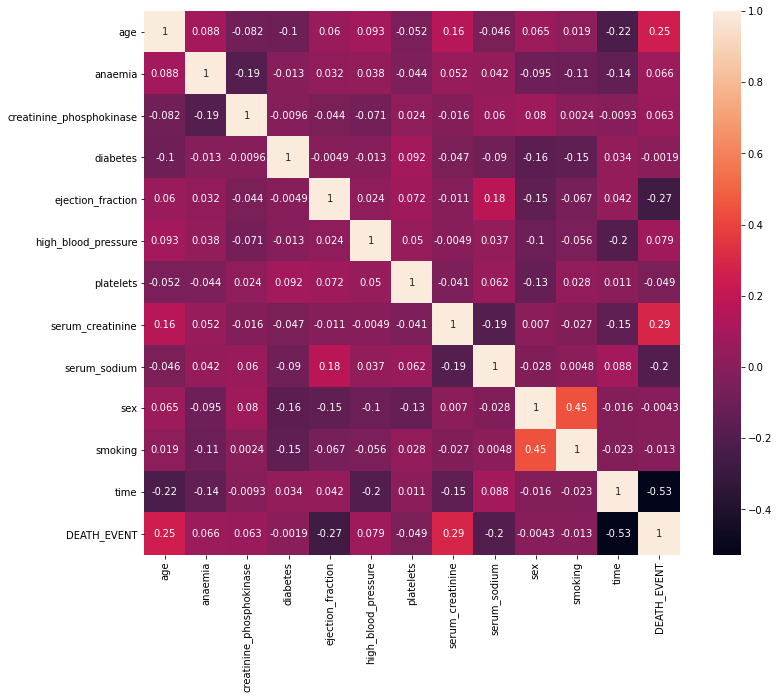

In [8]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True)

From the above graph we can observe that Age, Sex, Smoking, Serum_creatinine, Time and Death_Event are having slight greater correlation values as compared to others

<AxesSubplot:xlabel='count', ylabel='anaemia'>

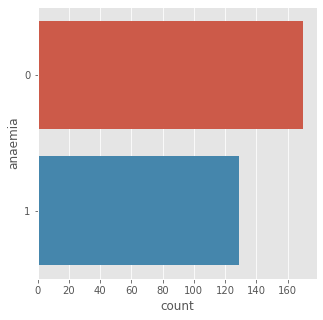

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(5, 5))
sns.countplot(y='anaemia', data=df)

Most of the patients are having Anaemia diease

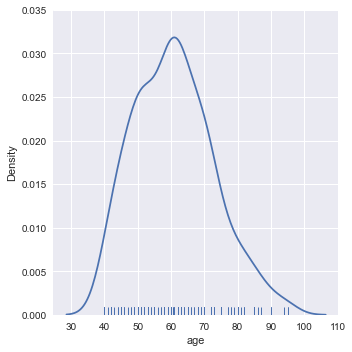

In [10]:
plt.style.use('seaborn')
sns.displot(df.age, rug=True, kind='kde')

<AxesSubplot:xlabel='sex', ylabel='age'>

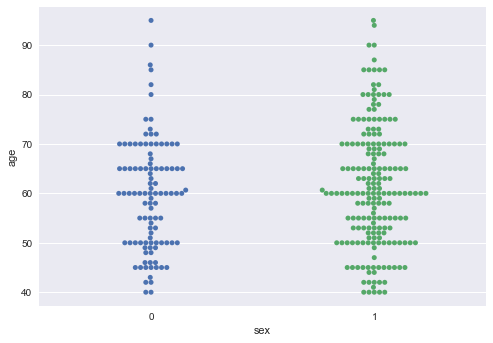

In [11]:
sns.swarmplot(data=df, x=df.sex, y=df.age)

From the above two graphs we could say that the age between 55-70 are having highest population

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

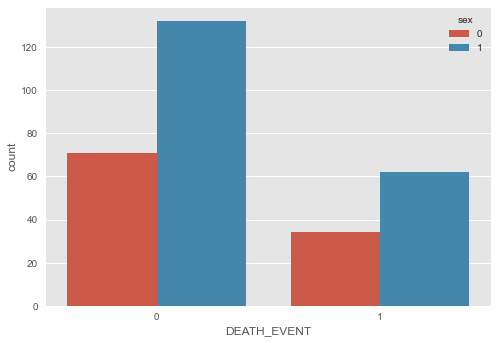

In [12]:
plt.style.use('ggplot')
sns.countplot(x=df['DEATH_EVENT'], hue=df['sex'], data=df)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

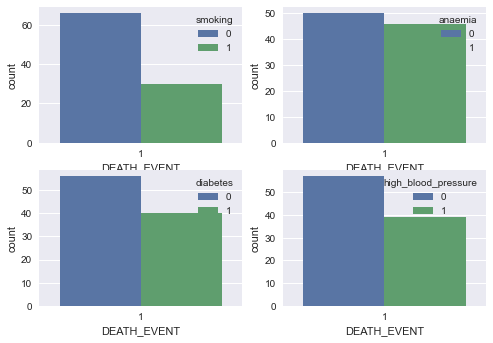

In [13]:
plt.style.use('seaborn')
plt.subplot(2, 2, 1)
sns.countplot(x=df['DEATH_EVENT'][df.DEATH_EVENT == 1], hue=df.smoking, data=df)

plt.subplot(2, 2, 2)
sns.countplot(x=df['DEATH_EVENT'][df.DEATH_EVENT == 1], hue=df.anaemia, data=df)

plt.subplot(2, 2, 3)
sns.countplot(x=df['DEATH_EVENT'][df.DEATH_EVENT == 1], hue=df.diabetes, data=df)

plt.subplot(2, 2, 4)
sns.countplot(x=df['DEATH_EVENT'][df.DEATH_EVENT == 1], hue=df.high_blood_pressure, data=df)

From the above graphs we can observe that the patients having Anaemia, Diabetes and High BP are having less chance of surviving

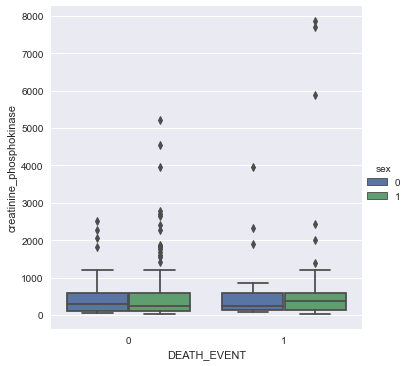

In [14]:
sns.catplot(data=df, x='DEATH_EVENT', y='creatinine_phosphokinase', hue='sex', kind='box')

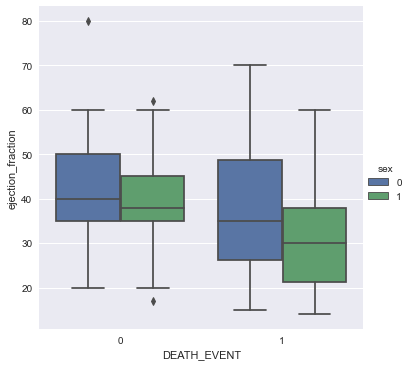

In [15]:
sns.catplot(data=df, x='DEATH_EVENT', y='ejection_fraction', hue='sex', kind='box')

Lesser the ejection_fraction value, lesser chance of surviving

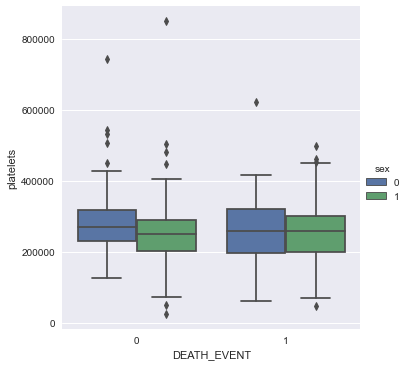

In [16]:
sns.catplot(data=df, x='DEATH_EVENT', y='platelets', hue='sex', kind='box')

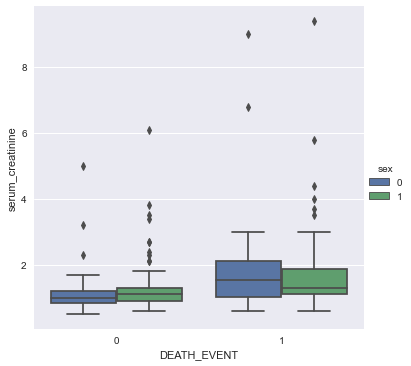

In [17]:
sns.catplot(data=df, x='DEATH_EVENT', y='serum_creatinine', hue='sex', kind='box')

Larger the serum_creatinine value lesser chance of surviving

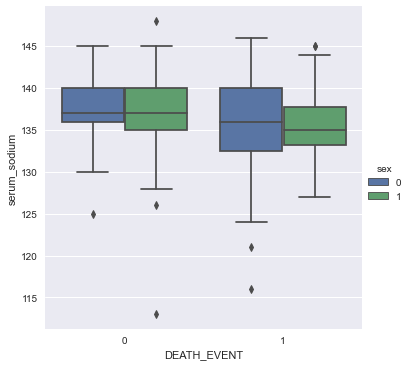

In [18]:
sns.catplot(data=df, x='DEATH_EVENT', y='serum_sodium', hue='sex', kind='box')

In the medical research, a normal blood sodium level is between 135 and 145 milliequivalents per liter(mEq/L), so lesser the value having lesser chance of surviving

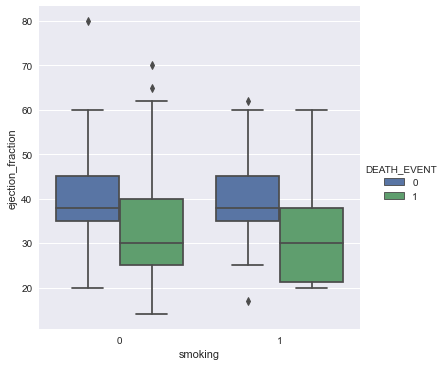

In [19]:
sns.catplot(data=df, x='smoking', y='ejection_fraction', hue='DEATH_EVENT', kind='box')

Ejection Fraction less than 40% will increases the risk of life-threatening heartbeats and cardiac

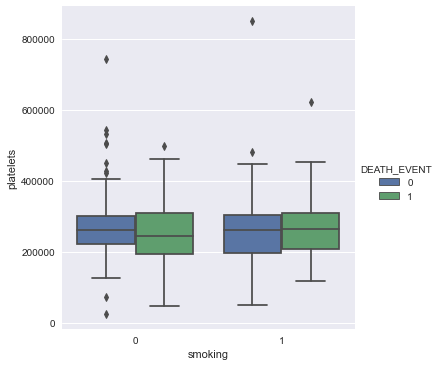

In [20]:
sns.catplot(data=df, x='smoking', y='platelets', hue='DEATH_EVENT', kind='box')

A normal platelet count ranges from 150k to 450k platelets pernmicroliter of blood.

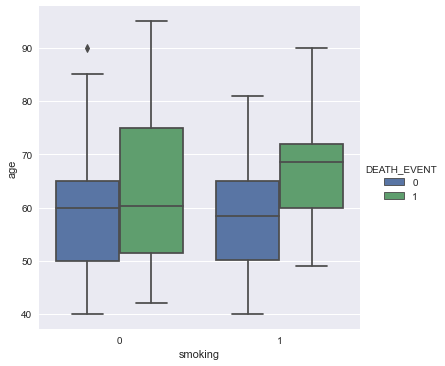

In [21]:
sns.catplot(data=df, x='smoking', y='age', hue='DEATH_EVENT', kind='box')

From the graph, the smoking person of age greater than 60 are having less chance of surviving.

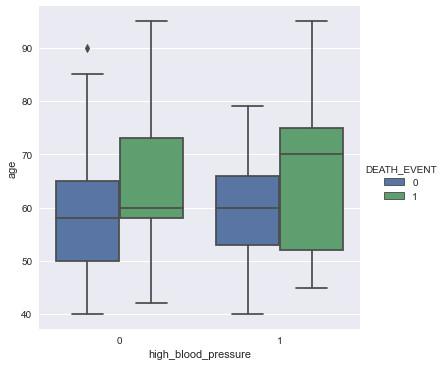

In [22]:
sns.catplot(data=df, x='high_blood_pressure', y='age', hue='DEATH_EVENT', kind='box')

If the person having high BP of age greater than 55 are having less chance of surviving

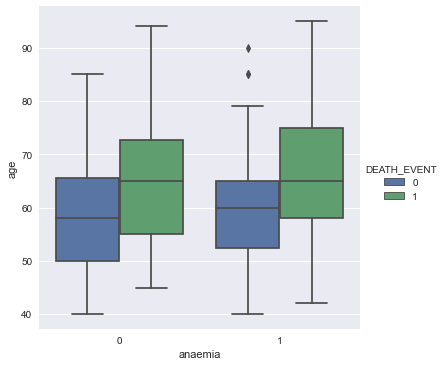

In [23]:
sns.catplot(data=df, x='anaemia', y='age', hue='DEATH_EVENT', kind='box')

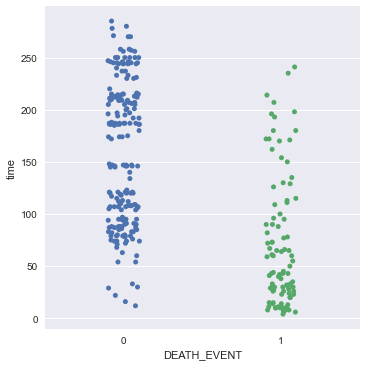

In [24]:
sns.catplot(data=df, x='DEATH_EVENT', y='time')

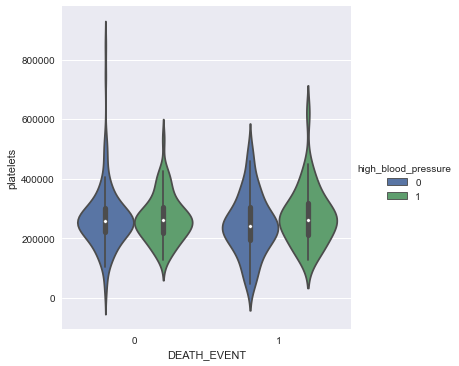

In [25]:
sns.catplot(data=df, x='DEATH_EVENT', y='platelets', hue='high_blood_pressure', kind='violin')

In [26]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

### LogisticRegression

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=200)

In [29]:
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [30]:
log_reg.score(x_test, y_test)

0.8666666666666667

### RandomForestClassifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier()

In [32]:
rand_forest.fit(x_train, y_train)

RandomForestClassifier()

In [33]:
rand_forest.score(x_test, y_test)

0.9333333333333333

### DecisionTreeClassifier

In [34]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()

In [35]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [36]:
decision_tree.score(x_test, y_test)

0.8666666666666667

### SupportVectorMachine

In [37]:
from sklearn.svm import SVC
svc = SVC()

In [38]:
svc.fit(x_train, y_train)

SVC()

In [39]:
svc.score(x_test, y_test)

0.7166666666666667

## Conclusion:

RandomForestClassifier is the best model for this Dataset

In [40]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(y_test, rand_forest.predict(x_test))
c_mat

array([[43,  0],
       [ 4, 13]], dtype=int64)

Text(52.0, 0.5, 'Predicted Values')

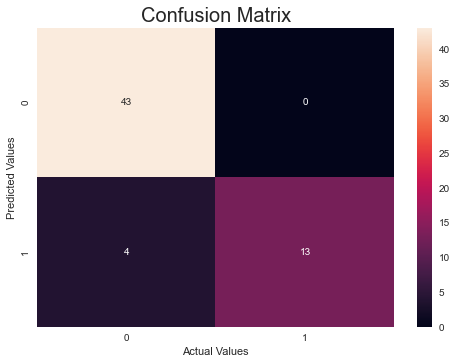

In [46]:
sns.heatmap(c_mat, annot=True)
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

Confusion Matrix for RandomForestClassifier.